# Explore sources of iron and their predictability

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import esm4ppe
import xarray as xr

In [28]:
variables = [
    'intpp',
    'dep_dry_fed',
    'dep_dry_lith',
    'dep_wet_fed',
    'dep_wet_lith',
    'ffe_iceberg',
    'dfeos',
    'MLD_003'
]

## Calculate PPP

In [29]:
skill = xr.Dataset()
for variable in variables:
    print(variable)
    es = esm4ppe.esm4ppeObj(variable,'monthly')
    es = es.add_ensemble().add_control().verify('ppp',saveskill=True,groupby='month')
    skill[variable] = es.vs[variable]

intpp
Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... control opened.
Opening skill metric... skill metric opened.
dep_dry_fed
Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... control opened.
Opening skill metric... skill metric opened.
dep_dry_lith
Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... control opened.
Opening skill metric... skill metric opened.
dep_wet_fed
Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... control opened.
Opening skill metric... skill metric opened.
dep_wet_lith
Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... contr

## Take regional means

In [30]:
rm = xr.Dataset()
for variable in variables:
    print(variable)
    es = esm4ppe.esm4ppeObj(variable,'monthly')
    es = es.verify('ppp',groupby='month').regionalmean('basin',saveregionalmean=True,verbose=True)
    rm[variable] = es.vs[variable]

intpp
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
dep_dry_fed
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
dep_dry_lith
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
dep_wet_fed
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
dep_wet_lith
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
ffe_iceberg
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening regional means of vs... regional means of vs opened.
dfeos
Opening static... static opened.
Opening skill metric... skill metric opened.
Opening region

# Plot progression of predictability

In [31]:
import matplotlib.pyplot as plt

(0.0, 1.0)

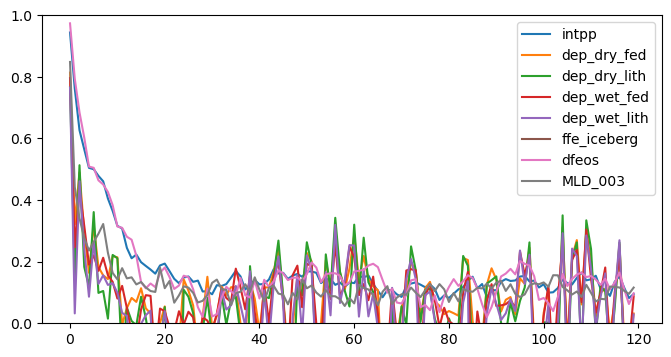

In [32]:
region = 'pacific_T'
month = 1
rmnow = rm.sel(region=region,month=month)

fig,ax = plt.subplots(figsize=(8,4))
for variable in variables:
    ax.plot(rmnow[variable],label=variable)
ax.legend()
ax.set_ylim([0,1])